In [12]:
from image import Image

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, MaxPool2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.python.client import device_lib
import tensorflow as tf

from sklearn.model_selection import train_test_split

## Simple ANN

#### Load images and labels, split the train and test datasets

In [27]:
# load the training set of images with their number of finger( labels ) 
# each element of image is a 25*25 array of values between 0 and 255
images, labels = Image.load_images("data", flatten=True)


[0 0 0 ... 0 0 0]


In [3]:
# shuffle the dataset (images and corresponding labels) and divide it in a train set (75% of dataset )and a test set (25% of dataset)
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, random_state=15, shuffle=True, test_size=.25)

#### Normalize the data and transform labels into categorical values

In [4]:
# normalizing the values by dividing the grayscale by 255 (the maximum value)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [29]:
# transform integers into array with 1 at index integer and zero at others
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


<class 'numpy.ndarray'>


numpy.ndarray

In [6]:

num_pixels = X_train.shape[1] # number of pixel on one image
num_classes = Y_test.shape[1] # number of possible fingers

#### Build the model

In [7]:
def ANN():
  # create model with 1 hidden layer
    model = Sequential()
    #Input and hidden layer
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #Output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy']) 
    return model

In [8]:
def ANN_2():
  # create model with 2 hidden layer
    model = Sequential()
    #Input and hidden layer
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #adding one more layer
    model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    #Output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy']) 
    return model

#### Train the model

In [9]:
# Training of the model with 1 hidden layer
# The model is fit over 10 epochs with updates every 200 images.

# build the model
model = ANN()

# Fit the model
#The test data is used as the validation dataset, allowing you to see the skill of the model as it trains.
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, batch_size=200, verbose=2)


# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Final accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 4480 samples, validate on 1494 samples
Epoch 1/15
 - 3s - loss: 5.0355 - acc: 0.3297 - val_loss: 3.8453 - val_acc: 0.4585
Epoch 2/15
 - 2s - loss: 3.3765 - acc: 0.5596 - val_loss: 3.1999 - val_acc: 0.6345
Epoch 3/15
 - 2s - loss: 2.9729 - acc: 0.6926 - val_loss: 3.0687 - val_acc: 0.6821
Epoch 4/15
 - 2s - loss: 2.8148 - acc: 0.7549 - val_loss: 3.0106 - val_acc: 0.7041
Epoch 5/15
 - 2s - loss: 2.7471 - acc: 0.7799 - val_loss: 2.9494 - val_acc: 0.7202
Epoch 6/15
 - 2s - loss: 2.6843 - acc: 0.8067 - val_loss: 2.8978 - val_acc: 0.7477
Epoch 7/15
 - 2s - loss: 2.6380 - acc: 0.8219 - val_loss: 2.8689 - val_acc: 0.7530
Epoch 8/15
 - 2s - loss: 2.6117 - acc: 0.8333 - val_loss: 2.8456 - val_acc: 0.7631
Epoch 9/15
 - 2s - loss: 2.5962 - acc: 0.8382 - val_loss: 2.8377 - val_acc: 0.7677
Epoch 10/15
 - 3s - loss: 2.5779 - acc: 0.8408 - val_loss: 2.8269 - val_acc: 0.7718
Epoch 11/15
 - 3s - loss: 2.5703 - acc: 0.8415 - val_loss: 2.8148 - val_acc: 0.7738
Epoch 12/15
 - 2s - loss: 2.5648 - ac

In [10]:
# Training of the model with 2 hidden layers
# The model is fit over 10 epochs with updates every 200 images.

# build the model
model_2 = ANN_2()
# Fit the model
hist_2 = model_2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, batch_size=200, verbose=2)
# The test data is used as the validation dataset, allowing you to see the skill of the model as it trains.

# Final evaluation of the model
scores = model_2.evaluate(X_test, Y_test, verbose=0)
print("Final accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 4480 samples, validate on 1494 samples
Epoch 1/15
 - 3s - loss: 1.6810 - acc: 0.3828 - val_loss: 1.2247 - val_acc: 0.5341
Epoch 2/15
 - 2s - loss: 1.0169 - acc: 0.6475 - val_loss: 0.8679 - val_acc: 0.7102
Epoch 3/15
 - 2s - loss: 0.6720 - acc: 0.7940 - val_loss: 0.6577 - val_acc: 0.7778
Epoch 4/15
 - 2s - loss: 0.4699 - acc: 0.8540 - val_loss: 0.4775 - val_acc: 0.8367
Epoch 5/15
 - 2s - loss: 0.3249 - acc: 0.9054 - val_loss: 0.3728 - val_acc: 0.8815
Epoch 6/15
 - 2s - loss: 0.1899 - acc: 0.9558 - val_loss: 0.2902 - val_acc: 0.9050
Epoch 7/15
 - 2s - loss: 0.1253 - acc: 0.9761 - val_loss: 0.2692 - val_acc: 0.9143
Epoch 8/15
 - 2s - loss: 0.0889 - acc: 0.9862 - val_loss: 0.2501 - val_acc: 0.9150
Epoch 9/15
 - 2s - loss: 0.0572 - acc: 0.9940 - val_loss: 0.2183 - val_acc: 0.9324
Epoch 10/15
 - 2s - loss: 0.0359 - acc: 0.9973 - val_loss: 0.1874 - val_acc: 0.9364
Epoch 11/15
 - 2s - loss: 0.0247 - acc: 0.9989 - val_loss: 0.1759 - val_acc: 0.9451
Epoch 12/15
 - 2s - loss: 0.0176 - ac

#### Use the model for prediction on another dataset

In [30]:
# load data from a new dataset and use the fitted model to get the number of finger on each picture
X_val, Y_val = Image.load_images("data_test", flatten=True)

#prepare data
X_val = X_val.astype('float32') / 255
Y_val = np_utils.to_categorical(Y_val)

In [14]:
# compute predictions using our models
Y_predict = model.predict(X_val)
Y_predict_2 = model_2.predict(X_val)

In [16]:
# compute and display the accuracy of our models by comparing predicted and real values
accuracy = sum(Y_predict.argmax(axis=1) == Y_val.argmax(axis=1)) / Y_val.shape[0]
accuracy_2 = sum(Y_predict_2.argmax(axis=1) == Y_val.argmax(axis=1)) / Y_val.shape[0]
print("Accuracy with the 1st model : %.2f%%" % (accuracy*100))
print("Accuracy with the 2nd model : %.2f%%" % (accuracy_2*100))

Accuracy with the 1st model : 45.16%
Accuracy with the 2nd model : 62.76%


#### Graphics

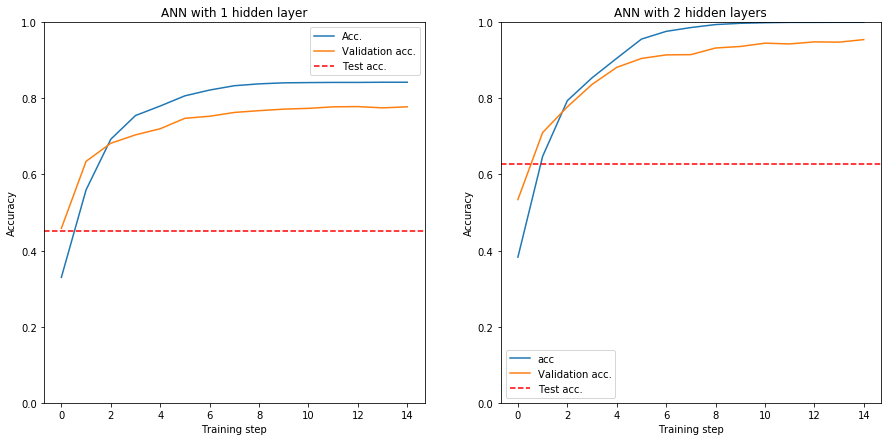

In [17]:
# Plot of the evolution of the accuracy 
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#accuracy with model1

# accuracy improvements during training of the model
ax1.plot(hist.history['acc'], label='Acc.')
ax1.plot(hist.history['val_acc'], label='Validation acc.')

# accuracy of the predictions with an other dataset ( doesn't depend on the training step because the model is already trained)
ax1.axhline(accuracy, ls='--', c='r', label='Test acc.')

ax1.set_ylim([0,1])
ax1.set_xlabel('Training step')
ax1.set_ylabel('Accuracy')
ax1.set_title('ANN with 1 hidden layer')
ax1.legend()



#accuracy with model2

# accuracy improvements during training of the model
ax2.plot(hist_2.history['acc'], label='acc')
ax2.plot(hist_2.history['val_acc'], label='Validation acc.')

# accuracy of the predictions with an other dataset ( doesn't depend on the training step because the model is already trained)
ax2.axhline(accuracy_2, ls='--', c='r', label='Test acc.')


ax2.set_ylim([0,1])
ax2.set_xlabel('Training step')
ax2.set_ylabel('Accuracy')
ax2.set_title('ANN with 2 hidden layers')
ax2.legend()

plt.show()

#### Live test

In [19]:
# Test the model with one hidden layer in live. Stay still for the prediction.
# 
# Press B to select a background
# Press SPACE to return an image
# Press ESC to shut the window
# Press R or L to move the window to the left or right
# Press P or M to increase or decrease the size of the window

img = Image.captureImage(model)

Escape hit, closing...


ValueError: Error when checking input: expected dense_1_input to have shape (2500,) but got array with shape (921600,)

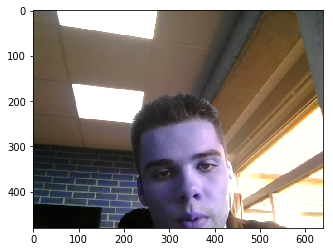

In [20]:
# Returned image
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show
print("Prediction :", model.predict(np.array([img.flatten()])).argmax())